# IBM "Applied Data Science Capstone" course (Week 1)

(Written by: D. Espinosa, Current date: 2020-11-03).

This notebook contains all the weekly activities required to complete and pass the IBM "Applied Data Science Capstone" course, the last of "IBM Data Science" Professional Certificate. Each section contains the corresponding week's assignment. Please notice that this notebook will be continuosly updated, until explicitely state it as "Final Version".

## Table of contents
   
* [ Week 1 Assignment (Warm up & Github sharing)](#week1)
* [Week 3, Part 1 (Segmenting and Clustering Neighborhoods in Toronto)](#week3p1)
* [Week 3, Part 2 (Segmenting and Clustering Neighborhoods in Toronto)](#week3p2)
* [Week 3, Part 3 (Segmenting and Clustering Neighborhoods in Toronto)](#week3p3)

## Week 1 Assignment (Warm up & Github sharing) <a class="anchor" id="week1"></a>

On this week, we are going to make some preliminary library imports, and print some regarding message, to test some basic functionality of the notebook of our choice.

In [26]:
import pandas as pd
import numpy as np
print('Test libraries imported successfully!\n\nHello Capstone Project Course!')

Test libraries imported successfully!

Hello Capstone Project Course!


## Week 3, Part 1 (Segmenting and Clustering Neighborhoods in Toronto) <a class="anchor" id="week3p1"></a>

### Description of the problem

For this assignment, you will be required to explore and cluster the neighborhoods in Toronto.

1. Start by creating a new Notebook for this assignment.

2. Use the Notebook to build the code to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M, in order to obtain the data that is in the table of postal codes and to transform the data into a pandas dataframe like the one shown below:

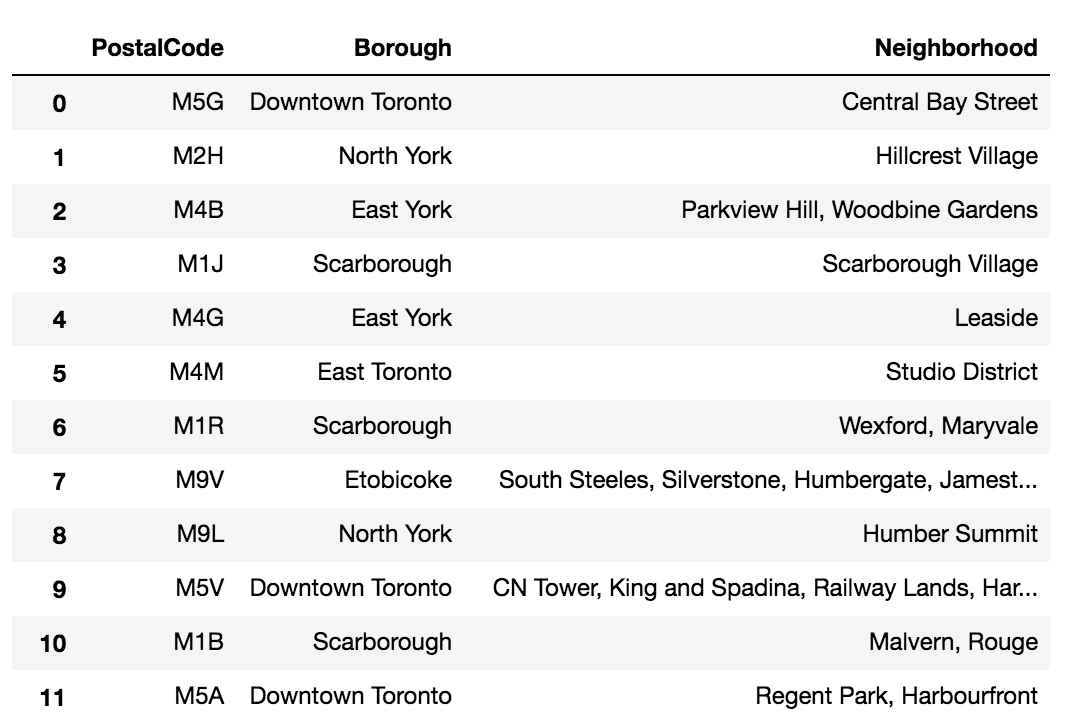

3. To create the above dataframe:

 - The dataframe will consist of three columns: PostalCode, Borough, and Neighborhood
 - Only process the cells that have an assigned borough. Ignore cells with a borough that is Not assigned.
 - More than one neighborhood can exist in one postal code area. For example, in the table on the Wikipedia page, you will notice that M5A is listed twice and has two neighborhoods: Harbourfront and Regent Park. These two rows will be combined into one row with the neighborhoods separated with a comma as shown in row 11 in the above table.
 - If a cell has a borough but a Not assigned neighborhood, then the neighborhood will be the same as the borough.
 - Clean your Notebook and add Markdown cells to explain your work and any assumptions you are making.
 - In the last cell of your notebook, use the .shape method to print the number of rows of your dataframe.


4. Submit a link to your Notebook on your Github repository. (**10 marks**)

Note: There are different website scraping libraries and packages in Python. For scraping the above table, you can simply use pandas to read the table into a pandas dataframe.

Another way, which would help to learn for more complicated cases of web scraping is using the BeautifulSoup package. Here is the package's main documentation page: http://beautiful-soup-4.readthedocs.io/en/latest/

Use pandas, or the BeautifulSoup package, or any other way you are comfortable with to transform the data in the table on the Wikipedia page into the above pandas dataframe.

### Solution 

First, we need to call the needed libraries. In this case, we will scrap the given website using BeautifulSoup4. Plus, we will create an empy Dataframe to store the results of the scrapping, as follows:

In [27]:
import requests
from bs4 import BeautifulSoup 

req = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(req.content,'html5lib')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))

df1=pd.DataFrame(df[0])
df1.rename(columns={'Postal Code':'PostalCode','Neighbourhood':'Neighborhood'},inplace=True)
df1 # Stores the results from the scrapping process

,PostalCode,Borough,Neighborhood
0,M1A,Not assigned,Not assigned
1,M2A,Not assigned,Not assigned
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park, Harbourfront"
...,...,...,...
175,M5Z,Not assigned,Not assigned
176,M6Z,Not assigned,Not assigned
177,M7Z,Not assigned,Not assigned
178,M8Z,Etobicoke,"Mimico NW, The Queensway West, South of Bloor,..."


Through the following line of code, we will ignore cells with a Borough that is 'Not assigned':

In [28]:
df1 = df1[df1['Borough'] != 'Not assigned'].reset_index(drop = True)

Then, with the following line we will merge neighborhoods inside a same cell, separated by comas, if the PostalCode is equal:

In [29]:
df1 = df1.groupby(['PostalCode','Borough'])['Neighborhood'].agg(', '.join).reset_index()

We will assign the Borough name to the Neighborhood name, if the latest is equal to 'Not Assigned':

In [30]:
def check_equals(Borough,Neighborhood):
    if Neighborhood == 'Not Assigned':
        Neighborhood = Borough
    return Neighborhood   
df1['Neighborhood'] = df1.apply(lambda x:check_equals(x['Borough'], x['Neighborhood']),axis=1)
df1

,PostalCode,Borough,Neighborhood
0,M1B,Scarborough,"Malvern, Rouge"
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
...,...,...,...
98,M9N,York,Weston
99,M9P,Etobicoke,Westmount
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ..."
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest..."


As the latest requirement of the task, we will display the shape of the resulting dataframe:

In [31]:
print('Shape after replacing Neighborhood = Borough (if Neighborhood==\'Not assigned\'):',df1.shape)

Shape after replacing Neighborhood = Borough (if Neighborhood=='Not assigned'): (103, 3)


## Week 3, Part 2 (Segmenting and Clustering Neighborhoods in Toronto) <a class="anchor" id="week3p2"></a>

### Description of the problem

Now that we have built a dataframe of the postal code of each neighborhood along with the borough name and neighborhood name, in order to utilize the Foursquare location data, we need to get the latitude and the longitude coordinates of each neighborhood.

In an older version of this course, we were leveraging the Google Maps Geocoding API to get the latitude and the longitude coordinates of each neighborhood. However, recently Google started charging for their API: http://geoawesomeness.com/developers-up-in-arms-over-google-maps-api-insane-price-hike/, so we will use the Geocoder Python package instead: https://geocoder.readthedocs.io/index.html.

The problem with this Package is you have to be persistent sometimes in order to get the geographical coordinates of a given postal code. So you can make a call to get the latitude and longitude coordinates of a given postal code and the result would be None, and then make the call again and you would get the coordinates. So, in order to make sure that you get the coordinates for all of our neighborhoods, you can run a while loop for each postal code. Taking postal code M5G as an example, your code would look something like this:

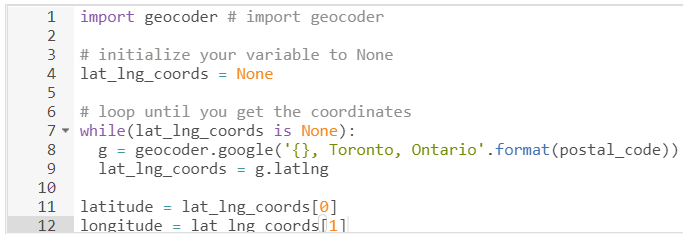

Given that this package can be very unreliable, in case you are not able to get the geographical coordinates of the neighborhoods using the Geocoder package, here is a link to a csv file that has the geographical coordinates of each postal code: http://cocl.us/Geospatial_data

Use the Geocoder package or the csv file to create the following dataframe:

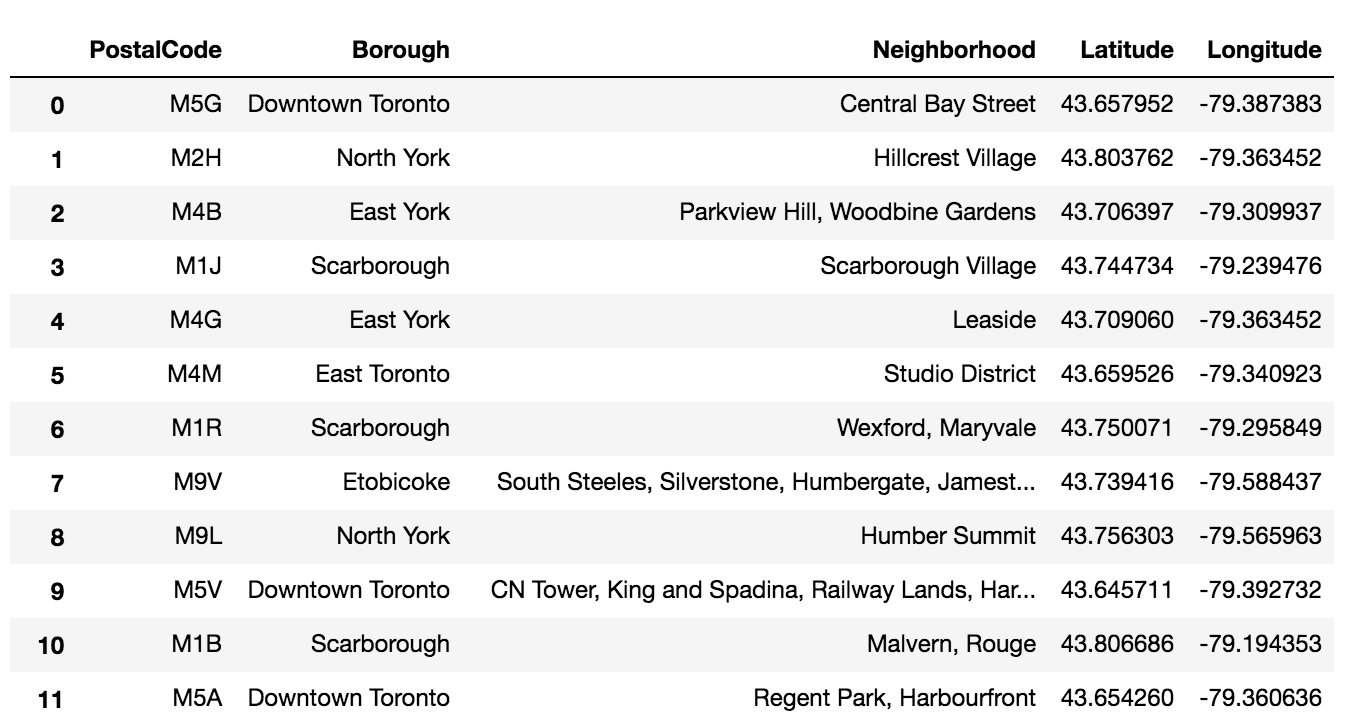

Important Note: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (**2 marks**)

### Solution 

First, we need to call the library 'geocoder', making sure to install it, if it is not available.

In [32]:
!pip install geocoder
import geocoder
import time # To measure the elapsed time later on

Let's test the previously installed package, with the example code provided, as well as some minor twists (please check the comments for further info):

In [33]:
lat_lng_coords = None
postal_code = 'M5G'
attempts = 0

starttime = time.time()

#loop until you get the coordinates
while(lat_lng_coords is None):
    g = geocoder.google('{}, Toronto, Ontario'.format(postal_code))
    lat_lng_coords = g.latlng    
    attempts+=1
    if attempts % 10 == 0:
        print('Number of unsuccessful attempts:',attempts)
    if attempts > 99:
        print('WARNING: Too many failed attempts! Try reading the provided \'containment .csv\' file instead!')
        break

endtime = time.time()

if lat_lng_coords != None:
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    print(latitude, longitude)

print('Elapsed time in a SINGLE search request: {:.2f} seconds'.format(endtime-starttime))

Number of unsuccessful attempts: 10
Number of unsuccessful attempts: 20
Number of unsuccessful attempts: 30
Number of unsuccessful attempts: 40
Number of unsuccessful attempts: 50
Number of unsuccessful attempts: 60
Number of unsuccessful attempts: 70
Number of unsuccessful attempts: 80
Number of unsuccessful attempts: 90
Number of unsuccessful attempts: 100
Elapsed time in a SINGLE search request: 23.89 seconds


Ups! It seems it did not work. We could increase the number of attempts, but lets be practical: with around 24 seconds per row, and with 'only' 94 rows in our dataset (this dataframe is a relatively 'tiny' one), we would spend around **38 minutes waiting**! For practical purposes, and provided we are working with a real-life data, it might be a good idea to approach with other Geocoding API, maybe a paid one. Let's move on the, to read the temporarily provided csv file:

In [34]:
geocode_df = pd.read_csv('Geospatial_Coordinates.csv')
geocode_df.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


We are nearly there! Now, we are going to use the [merge function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) to join the dataframes, but we need to rename the column 'PostalCode' on 'geocode_df', since this will be the "Column or index level names to join on"; next, we perform the merge:

In [35]:
geocode_df.rename(columns={'Postal Code':'PostalCode'},inplace=True) # So 'PostalCode' exist in both df to merge
df2 = pd.merge(left=df1,right=geocode_df,on='PostalCode')
df2

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
...,...,...,...,...,...
98,M9N,York,Weston,43.706876,-79.518188
99,M9P,Etobicoke,Westmount,43.696319,-79.532242
100,M9R,Etobicoke,"Kingsview Village, St. Phillips, Martin Grove ...",43.688905,-79.554724
101,M9V,Etobicoke,"South Steeles, Silverstone, Humbergate, Jamest...",43.739416,-79.588437


## Week 3, Part 3: <a class="anchor" id="week3p3"></a>
### Description of the problem

Explore and cluster the neighborhoods in Toronto. You can decide to work with only boroughs that contain the word Toronto and then replicate the same analysis we did to the New York City data. It is up to you.

Just make sure:

 - to add enough Markdown cells to explain what you decided to do and to report any observations you make.
 - to generate maps to visualize your neighborhoods and how they cluster together.

Once you are happy with your analysis, submit a link to the new Notebook on your Github repository. (**3 marks**)

Important Note: There is a limit on how many times you can call geocoder.google function. It is 2500 times per day. This should be way more than enough for you to get acquainted with the package and to use it to get the geographical coordinates of the neighborhoods in the Toronto.

Once you are able to create the above dataframe, submit a link to the new Notebook on your Github repository. (**2 marks**)

### Solution

First, we need to call the additional libraries needed to carry on with this task, making sure to install them, if they are not available.

In [36]:
# If you have any missing library, uncomment to install:
#!conda install -c conda-forge geopy --yes        # uncomment this line if you don't have GEOPY
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you don't have FOLIUM

# IMPORTING LIBRARIES

import json # library to handle JSON files
import requests # library to handle requests
import folium # map rendering library
import matplotlib.cm as cm
import matplotlib.colors as colors

# IMPORTING SPECIFIC MODULES

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from sklearn.cluster import KMeans # import k-means from clustering stage

# Pandas visualization options (uncomment if needed)

# pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

Then, we use geopy library to get the latitude and longitude values of Toronto City.

In [37]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto, Ontario are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto, Ontario are 43.6534817, -79.3839347.


To have some preliminary visual glimpse of the data we will cluster, we create a map of Toronto with neighborhoods superimposed on top.

In [38]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df2['Latitude'], df2['Longitude'], df2['Borough'], df2['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

#### Segmenting

Before proceeding with the segmenting part, we need to define FourSquare API credentials & keys:

In [39]:
CLIENT_ID = 'UFFXIDN5WWVHYRAEHNRGPZKUGOFF1I1MRE1ZOVCWGCDMVV0G' # your Foursquare ID
CLIENT_SECRET = 'K0PMVXYM10N5RI4UFLOOBY3CGAGCBQ3DLF3YZ3IU2UJY1HOY' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

We start now working on the segmenting part. First, we implement the required functions:

In [40]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):   
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print('Extring venues from (neighborhood):',name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Then we get Toronto venues:

In [41]:
toronto_venues = getNearbyVenues(names = df2['Neighborhood'],
                                   latitudes = df2['Latitude'],
                                   longitudes = df2['Longitude'])

Extring venues from (neighborhood): Malvern, Rouge
Extring venues from (neighborhood): Rouge Hill, Port Union, Highland Creek
Extring venues from (neighborhood): Guildwood, Morningside, West Hill
Extring venues from (neighborhood): Woburn
Extring venues from (neighborhood): Cedarbrae
Extring venues from (neighborhood): Scarborough Village
Extring venues from (neighborhood): Kennedy Park, Ionview, East Birchmount Park
Extring venues from (neighborhood): Golden Mile, Clairlea, Oakridge
Extring venues from (neighborhood): Cliffside, Cliffcrest, Scarborough Village West
Extring venues from (neighborhood): Birch Cliff, Cliffside West
Extring venues from (neighborhood): Dorset Park, Wexford Heights, Scarborough Town Centre
Extring venues from (neighborhood): Wexford, Maryvale
Extring venues from (neighborhood): Agincourt
Extring venues from (neighborhood): Clarks Corners, Tam O'Shanter, Sullivan
Extring venues from (neighborhood): Milliken, Agincourt North, Steeles East, L'Amoreaux East
Extr

Now we quickly check the results from the venue search across Toronto:

In [42]:
print(toronto_venues.shape)
toronto_venues.head()

(2166, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Malvern, Rouge",43.806686,-79.194353,Wendy’s,43.807448,-79.199056,Fast Food Restaurant
1,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,Royal Canadian Legion,43.782533,-79.163085,Bar
2,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,SEBS Engineering Inc. (Sustainable Energy and ...,43.782371,-79.156820,Construction & Landscaping
3,"Guildwood, Morningside, West Hill",43.763573,-79.188711,RBC Royal Bank,43.766790,-79.191151,Bank
4,"Guildwood, Morningside, West Hill",43.763573,-79.188711,G & G Electronics,43.765309,-79.191537,Electronics Store


Next, we proceed to analyze each neighbourhood, based on 'Venue Category' column:

In [43]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,"Malvern, Rouge",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Rouge Hill, Port Union, Highland Creek",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Rouge Hill, Port Union, Highland Creek",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Guildwood, Morningside, West Hill",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category:

In [44]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped.head()

,Neighbourhood,Accessories Store,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,...,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agincourt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"Alderwood, Long Branch",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"Bathurst Manor, Wilson Heights, Downsview North",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bayview Village,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"Bedford Park, Lawrence Manor East",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


As addendum, we display a table with the 10 most common venues:

In [45]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Breakfast Spot,Latin American Restaurant,Skating Rink,Clothing Store,Event Space,Falafel Restaurant,Ethiopian Restaurant,Escape Room,Distribution Center
1,"Alderwood, Long Branch",Pizza Place,Sandwich Place,Coffee Shop,Pub,Pharmacy,Gym,Greek Restaurant,Discount Store,Department Store,Dessert Shop
2,"Bathurst Manor, Wilson Heights, Downsview North",Coffee Shop,Bank,Pharmacy,Ice Cream Shop,Shopping Mall,Bridal Shop,Sandwich Place,Diner,Middle Eastern Restaurant,Restaurant
3,Bayview Village,Japanese Restaurant,Café,Chinese Restaurant,Bank,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Yoga Studio
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Italian Restaurant,Coffee Shop,Greek Restaurant,Thai Restaurant,Locksmith,Liquor Store,Comfort Food Restaurant,Juice Bar,Butcher


#### Clustering

We start now working on the clustering part. First, we run k-means to cluster the neighborhood into 5 clusters:

In [46]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

To summarize, we create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [47]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
df3 = pd.merge(left=df2,right=neighborhoods_venues_sorted,on='Neighborhood')
df3.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M1B,Scarborough,"Malvern, Rouge",43.806686,-79.194353,4,Fast Food Restaurant,Yoga Studio,Drugstore,Discount Store,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant
1,M1C,Scarborough,"Rouge Hill, Port Union, Highland Creek",43.784535,-79.160497,1,Construction & Landscaping,Bar,Yoga Studio,Dumpling Restaurant,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Eastern European Restaurant
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711,1,Intersection,Breakfast Spot,Electronics Store,Restaurant,Medical Center,Rental Car Location,Bank,Mexican Restaurant,Doner Restaurant,Distribution Center
3,M1G,Scarborough,Woburn,43.770992,-79.216917,1,Coffee Shop,Mexican Restaurant,Korean BBQ Restaurant,Distribution Center,Dive Bar,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Yoga Studio
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476,1,Gas Station,Fried Chicken Joint,Bakery,Bank,Athletics & Sports,Thai Restaurant,Caribbean Restaurant,Hakka Restaurant,Eastern European Restaurant,Dumpling Restaurant


And finally, we viaualize the results of the clustering in the map:

In [48]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df3['Latitude'], df3['Longitude'], df3['Neighborhood'], df3['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

The task is completed now.